<center><b><u><font size="6">AIDE DECISIONNELLE</font></u></b></center>

Bienvenue dans ce Notebook traitant d'un exemple d'aide décisionnelle. Ce Notebook est mon premier projet et avait pour but d'apprendre à manipuler Pandas, numpy et matplotlib. La qualité du code n'est pas la chose qui nous importe ici. Ce qui nous intéresse c'est plutôt la réflexion que l'on doit avoir quand on traite un sujet aboutissant à une aide décisionnelle. A savoir :
 - Réflexion
 - Analyse
 - Livrables (graphiques) à présenter au client sur un support spécifique (Word, Powerpoint, etc.)

Aller, c'est parti! Je vais tenter d'être le plus clair possible dans mes commentaires. Bon courage!

# Programme d'analyse des systèmes éducatifs mondiaux.
Le but est d'analyser si les données sur l'éducation fournies par la banque mondiale permettent d'informer si Academy, entreprise de formations en ligne niveau lycée et universitépeut s'étendre à l'international.

### <u>Les questions posées par le client :</u>

 - Quels sont les pays avec un fort potentiel de clients pour nos services ?
 - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
 - Dans quels pays l'entreprise doit-elle opérer en priorité ?

### <u>Le travail consiste à :</u>

 - Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
 - Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
 - Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant  des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
 - Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
 
### <u>Les ressources :</u>

 - Le lien de téléchargement des données : https://datacatalog.worldbank.org/dataset/education-statistics
 - Le site de la banque mondiale de données : http://datatopics.worldbank.org/education/

In [32]:
#On commence par appeler les librairies nécessaires au projet
#Numpy est une librairie contenant les fonctions de mathématiques
#Pandas est une librairie permettant de manipuler facilement les dataset
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#On charge les csv nécessaires à l'étude en cours
stats_data = pd.read_csv('EdStatsData.csv')
country_data = pd.read_csv('EdStatsCountry.csv')
footnote_data = pd.read_csv('EdStatsFootNote.csv')
series_data = pd.read_csv('EdStatsSeries.csv')
country_series_data = pd.read_csv('EdStatsCountry-Series.csv')

## Commençons d'abord par étudier la structure du dataset étudié : stats_data

### Nous allons calculer :
 - Le nombre de lignes totales (1 ligne = 1 indicateur)
 - Le nombre d'indicateurs par régions ou pays

In [3]:
#On regarde le nombre de lignes et de colonnes
stats_data.shape

(886930, 70)

In [4]:
#On calcule le nombre d'indicateurs utiles par région
nbr_indicateurs = pd.Series(stats_data['Country Name'].value_counts())

nbr_indicateurs = pd.DataFrame({'Région':nbr_indicateurs.index, 'Nbr Indicateurs':nbr_indicateurs.values})
nbr_indicateurs.head()

,Région,Nbr Indicateurs
0,Brazil,3665
1,Estonia,3665
2,"Iran, Islamic Rep.",3665
3,High income,3665
4,Mali,3665


## La première partie de l'exercice consiste à séparer les données par région et par pays.

Le datatset stats_data est rangé de tel sorte que les régions sont classées en premier jusqu'à la ligne 'World' de la colonne 'Country name'. Ensuite nous avons les pays.

### Le premier exercice consiste à diviser le dataframe en 2 :
 - Un par régions
 - Un par pays
 
Ensuite, nous étudierons le taux de remplissage des données dans chaque dataframe pour répondre à la question : "Quel est le taux de données manquantes dans le dataset fournit en entrée?"
Pour cela, on enlevera d'abord les lignes où il n'y a aucune donnée d'indicateur.

In [5]:
#On recherche la limite des régions dans le dataset de départ
#Cela nous permettra de spliter le dataframe en 2 par la suite
ligne_split = stats_data[stats_data['Country Name'] == 'World']

In [6]:
#On crée le dataframe contenant les données par régions
data_par_regions = stats_data.loc[:91624,:]
data_par_regions.shape

(91625, 70)

In [7]:
#"Quel est le taux de données manquantes dans le dataset fournit en entrée?"
#Nous allons calculer le taux de remplissage de données par régions
nbr_donnees_totales = data_par_regions.shape[0] * data_par_regions.shape[1]
nbr_donnees_totales

nbr_donnees_nulles = data_par_regions.isnull().sum().sum()
nbr_donnees_nulles

taux_remplissage_regions = (nbr_donnees_nulles / nbr_donnees_totales)*100
taux_remplissage_regions

89.79603196258039

In [8]:
#On teste s'il y a des lignes dupliquées
#Si la valeur de data_par_regions.shape[0] = à la valeur précédente, alors il n'y a pas d'élément dupliqué
data_par_regions.drop_duplicates()
data_par_regions.shape

(91625, 70)

In [9]:
#On supprime toutes les lignes où aucune année ne contient de données
#La fonction dropna() sert à supprimer des lignes contenant des cellules vides NaN.

#On commence par créer une liste avec les cellules à tester
colonnes_a_tester = list(data_par_regions.loc[:,"1970":])

#Ensuite,on utilise le dropna()
#le paramètre how='all' configure la fonction pour qu'il teste que TOUTES les cellules soient vides
#Le subset, c'est la plage de cellules à tester. Celle qu'on a déterminé précédemment.
data_par_regions = data_par_regions.dropna(how="all", subset=colonnes_a_tester)

data_par_regions.shape

(9312, 70)

In [10]:
#On crée le dataframe contenant les données par pays
data_par_pays = stats_data.loc[91625:,:]
data_par_pays.shape

(795305, 70)

In [11]:
#On calcule le nombre de pays total
nbr_pays_total = data_par_pays['Country Code'].unique()
nbr_pays_total = nbr_pays_total.shape[0]
nbr_pays_total

217

In [12]:
#"Quel est le taux de données manquantes dans le dataset fournit en entrée?"
#Nous allons calculer le taux de remplissage de données par pays
nbr_donnees_totales = data_par_pays.shape[0] * data_par_pays.shape[1]
nbr_donnees_totales

nbr_donnees_nulles = data_par_pays.isnull().sum().sum()
nbr_donnees_nulles

taux_remplissage_pays = (nbr_donnees_nulles / nbr_donnees_totales)*100
taux_remplissage_pays

85.67402443087872

In [13]:
#On teste s'il y a des lignes dupliquées
data_par_pays.drop_duplicates()
data_par_pays.shape

(795305, 70)

In [14]:
#On supprime toutes les lignes où aucune année ne contient de données
#La fonction dropna() sert à supprimer des lignes contenant des cellules vides NaN.

#On commence par créer une liste avec les cellules à tester
colonnes_a_tester = list(data_par_pays.loc[:,"1970":])

#Ensuite,on utilise le dropna()
#le paramètre how='all' configure la fonction pour qu'il teste que TOUTES les cellules soient vides
#Le subset, c'est la plage de cellules à tester. Celle qu'on a déterminé précédemment.
data_par_pays = data_par_pays.dropna(how="all", subset=colonnes_a_tester)

data_par_pays.shape

(348093, 70)

Nous avons maintenant 2 dataframes. Un avec les données par régions, l'autre par pays.
Nous avons également les taux de remplissage de chaque dataframe.

### Il serait intéressant de voir dans un tableau récapitulatif :
 - le nombre de régions
 - le nombre d'indicateurs par région
 - la moyenne d'indicateur par région
 
### Pour les pays :
 - le nombre de pays
 - le nombre d'indicateurs par pays
 - la moyenne d'indicateur par pays

In [15]:
#On calcule le nombre d'indicateurs utiles par région
indicateurs_regions = pd.Series(data_par_regions['Country Name'].value_counts())

indicateurs_regions = pd.DataFrame({'Région':indicateurs_regions.index, 'Nbr Indicateurs':indicateurs_regions.values})
indicateurs_regions.head()

,Région,Nbr Indicateurs
0,World,663
1,Sub-Saharan Africa,382
2,Sub-Saharan Africa (excluding high income),382
3,Latin America & Caribbean (excluding high income),379
4,Middle East & North Africa (excluding high inc...,375


In [16]:
#Même exercice pour les pays
indicateurs_pays = pd.Series(data_par_pays['Country Name'].value_counts())

indicateurs_pays = pd.DataFrame({'Pays':indicateurs_pays.index, 'Nbr Indicateurs':indicateurs_pays.values})
indicateurs_pays.shape

(217, 2)

In [17]:
#On calcule le nombre de pays qui ont au minimum un indicateur
nbr_pays = data_par_pays['Country Code'].unique()
nbr_pays = nbr_pays.shape[0]
nbr_pays

217

In [18]:
#On calcule le nombre total d'indicateurs pour les régions
nbr_indicateurs_regions = indicateurs_regions['Nbr Indicateurs'].sum()
nbr_indicateurs_regions

9312

In [19]:
#On calcule le nombre total d'indicateurs pour les pays
nbr_indicateurs_pays = indicateurs_pays['Nbr Indicateurs'].sum()
nbr_indicateurs_pays

348093

In [20]:
#On calcule la moyenne des indicateurs par régions
moyenne_indic_regions = indicateurs_regions['Nbr Indicateurs'].mean()
moyenne_indic_regions

372.48

In [21]:
#On calcule la moyenne des indicateurs par pays
moyenne_indic_pays = indicateurs_pays['Nbr Indicateurs'].mean()
moyenne_indic_pays

1604.115207373272

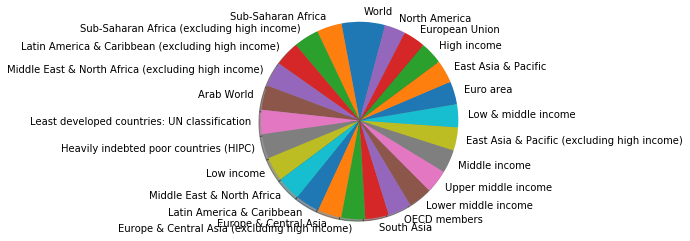

In [22]:
labels = indicateurs_regions['Région']
sizes = indicateurs_regions['Nbr Indicateurs']
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, shadow=True, startangle=75)

plt.axis('equal')

#plt.savefig('PieChart01.png')
plt.show()

L'analyse exploratoire est terminée.

Afin de commencer une analyse plus fine des données, nous allons coder quelques fonctions qui nous aideront à alléger le code.

In [23]:
#Permet de calculer, dans le dataset de base, le taux de remplissage de données pour un indicateur choisi
#Le tri se fera par le prefixe de l'indicateur ou par son nom complet
#La fonction retournera un dataframe

def recherche_indicateur(df, prefixe):
    
    #Nous allons créer un tableau contenant tous les indicateurs se rapportant au prefixe avec le taux de 
    #remplissage de données pour chaque indicateur.
    tri_indicateurs = pd.DataFrame(columns=['Pays','Code Indicateur','Taux de remplissage'])

    #Nous bouclons sur la liste des régions
    for i in df.itertuples():

        if prefixe in df.loc[i[0],'Indicator Code']:

            #On analyse les données sur 7 colonnes de 2010 à 2016
            nbr_donnees_totales = 7
            nbr_donnees_nulles = df.loc[i[0],'2010':'2016'].isnull().sum().sum()
            taux_remplissage_indicateur = 100-(nbr_donnees_nulles / nbr_donnees_totales)*100

            #On incrémente ensuite le tableau de sortie
            tri_indicateurs = \
                tri_indicateurs.append({'Pays':df.loc[i[0],'Country Name'], \
                                                'Code Indicateur':df.loc[i[0],'Indicator Code'], \
                                                'Taux de remplissage':taux_remplissage_indicateur}, ignore_index=True)

    return tri_indicateurs

In [24]:
#Permet de trier le dataset de base suivant un indicateur choisi et de faire le tri dans les années à analyser
#La fonction retournera un dataframe

def filtre_indicateur(df, indicateur):
    
    masque = df['Indicator Code'] ==  indicateur
    
    pays_filtres = df[masque]
    
    return pays_filtres

In [25]:
#Permet de créer un tableau avec les indicateurs utiles pour le choix d'un pays en fonction du pays choisi
#La fonction retournera un dataframe

def analyse_pays(df, pays):
    
    df_analyse = df[df['Country Name'].isin([pays])]
    df_analyse = df_analyse[df_analyse['Indicator Code']\
                                              .isin(['SE.TER.ENRL', 'NY.GDP.PCAP.CD',\
                                                     'IT.NET.USER.P2','SE.SEC.ENRL.GC','SP.POP.TOTL'])]

    df_analyse = df_analyse.reset_index(drop=True)
    return df_analyse

# Recherche des indicateurs utiles et pertinents pour l'analyse :

 ## Deux approches différentes pour construire notre analyse :
 
  - Approche 1 : les pays à fort potentiel sont les pays avec les populations les plus riches et ayant le plus facilement accès à internet.
    
       - D'abord analyser la région ayant le taux d'accès le plus élevé.
       - Ensuite, analyser les pays qui se trouvent dans cette région.
       - Indicateur pour le taux d'accès à internet (pour 100 personnes) : IT.NET.USER.P2
       - Indicateur du PIB par habitant ($) : NY.GDP.PCAP.CD
<br><br>
  - Approche 2 : les pays à fort potentiel sont les pays avec le nombres d'inscriptions en enseignements secondaire et supérieur le plus élevé.
    
       - D'abord analyser les pays avec le taux d'inscriptions en enseignement secondaire le plus élevé.
       - Ensuite analyser les pays avec le taux d'inscriptions en enseignement supérieur le plus élevé.
       - Inscription en secondaire général, les deux sexes : SE.SEC.ENRL.GC
       - Inscription dans l'enseignement supérieur, tous les programmes, les deux sexes : SE.TER.ENRL

### Chaque approche débouchera sur quelques pays les plus intéressant pour l'entreprise. Un récapitulalif de ces pays sera établi. Il comportera les informations suivantes :

 - Taux d'accès à internet
 - PIB par habitant
 - Populations totales : SP.POP.TOTL
 - Nbr d'inscriptions en secondaire
 - Nbr d'inscriptions en supérieur
 
### Comment trouver les indicateurs qui nous intéresse ici? 
 - En faisant des recherches sur internet par exemple, notament sur le site de la Banque Mondiale des données dont le lien est au début de ce Notebook.
 - En recherchant des mots clés dans les définitions des indicateurs que l'on peut trouver dans le dataset country_series_data (Ex. "GDP per capita" (traduction du PIB par habtant en anglais) ou encore "internet")

In [28]:
#D'abord analyser la région ayant le taux d'accès le plus élevé.

#On filtre le dataset de départ regroupant les régions par l'indicateur de taux d'accès à internet
data_par_regions_internet = filtre_indicateur(data_par_regions,'IT.NET.USER.P2')
data_par_regions_internet = data_par_regions_internet.sort_values(by = '2016', ascending = False)
data_par_regions_internet = data_par_regions_internet.reset_index(drop = True)
data_par_regions_internet.shape

(25, 70)

In [29]:
data_par_regions_internet['2016'].describe()

count    22.000000
mean     45.617993
std      21.771998
min      12.497428
25%      27.312665
50%      46.765849
75%      56.231258
max      81.967715
Name: 2016, dtype: float64

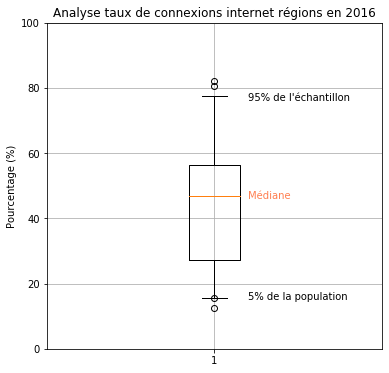

In [341]:
#Analyse de la connexion internet par régions

data = list(data_par_regions_internet['2016'].dropna())

fig, ax = plt.subplots(figsize=(6, 6))

ax.grid(True)

ax.boxplot(data,whis=[5,95])

ax.text(1.1, 46, 'Médiane', fontsize = 10, color = 'coral')
ax.text(1.1, 15, '5% de la population', fontsize = 10, color = 'black')
ax.text(1.1, 76, "95% de l'échantillon", fontsize = 10, color = 'black')

#On paramètre le graphique et on l'affiche
ax.set(ylim=[0,100],title="Analyse taux de connexions internet régions en 2016", ylabel='Pourcentage (%)')

#On enregistre le graphique
plt.savefig('evolution_internet_region.png', transparent = True, dpi = 700)

plt.show()


In [37]:
#On va calculer le taux d'accès à internet par régions
acces_internet_regions = recherche_indicateur(data_par_regions,'IT.NET.USER.P2')
acces_internet_regions = acces_internet_regions.sort_values(by = 'Taux de remplissage', ascending = False)
acces_internet_regions.head(1)

,Pays,Code Indicateur,Taux de remplissage
12,Low & middle income,IT.NET.USER.P2,100.0


In [38]:
#On calcule la moyenne des taux de données utiles
moy_taux_acc_int_region = acces_internet_regions['Taux de remplissage'].mean()
moy_taux_acc_int_region 

94.85714285714286

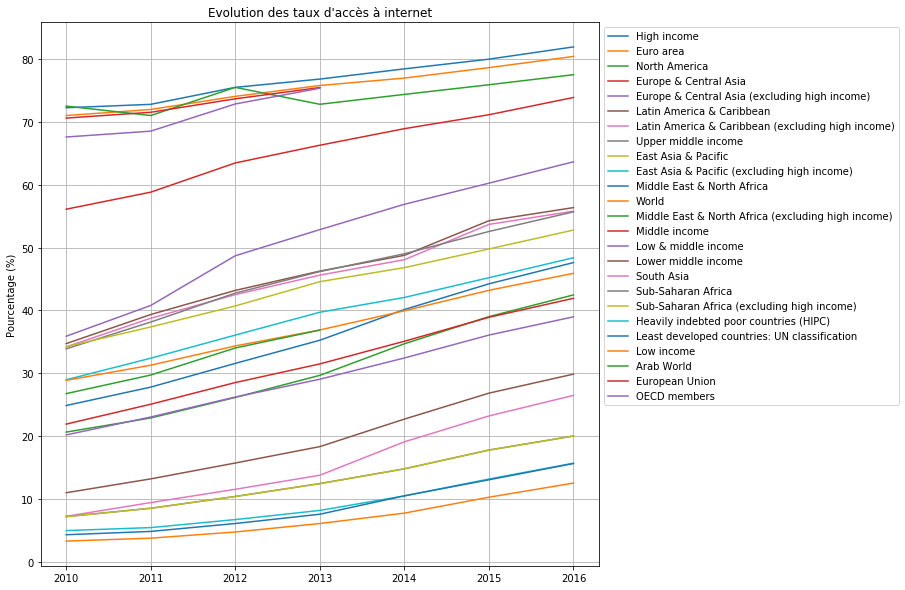

In [40]:
#On va superposer l'évolution des taux d'accès à internet de chaque région

annees = ['2010','2011','2012','2013','2014','2015','2016']

fig, ax = plt.subplots(figsize=(10, 10))

ax.grid(True)

#On trace les courbe de chaque région
for i in data_par_regions_internet.itertuples():
    
    ax.plot(annees, data_par_regions_internet.loc[i[0],'2010':'2016'],\
            label=data_par_regions_internet.loc[i[0],'Country Name'])

#On paramètre le graphique et on l'affiche
ax.set(title="Evolution des taux d'accès à internet", ylabel='Pourcentage (%)')
ax.legend(bbox_to_anchor = (1, 1), loc = 'upper left', prop = {'size': 10})

#On enregistre le graphique
plt.savefig('evolution_internet_region.png', transparent = True, dpi = 700)

plt.show()

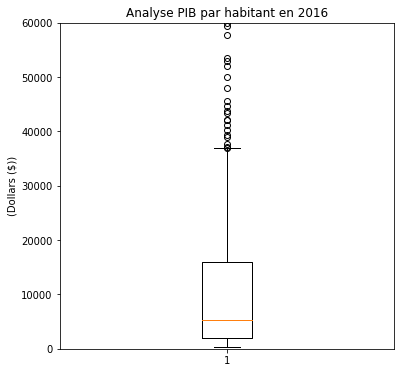

In [248]:
#Analyse du PIB par habitant des pays riches
data = list(pays_riches['2016'].dropna())

fig, ax = plt.subplots(figsize=(6, 6))

ax.boxplot(data)

#On paramètre le graphique et on l'affiche
ax.set(ylim=[0,60000],title="Analyse PIB par habitant en 2016", ylabel='(Dollars ($))')

#On enregistre le graphique
plt.savefig('Boite_moustache_PIB.png', transparent = True, dpi = 700)

plt.show()

In [41]:
#Maintenant, analysons quels sont les pays se trouvant dans la région high income
#Ces données se trouvent dans le dataframe country_data

pays_region_principale = country_data.loc[country_data['Region'] == 'High income',:]
pays_region_principale.shape

#Le résultat étant nul, nous allons faire une analyse par pays avec les plus hauts revenus

(0, 32)

In [42]:
#On crée un tableau pour analyser les pays les plus riches
#Pour cela, on utilise l'indicateur du PIB par habitant
pays_riches = filtre_indicateur(data_par_pays,'NY.GDP.PCAP.CD')
pays_riches = pays_riches.sort_values(by = '2016', ascending = False)
pays_riches = pays_riches.reset_index(drop = True)
pays_riches.shape

(209, 70)

In [43]:
#On calcule la moyenne des données
taux_donnees_pays_riches = recherche_indicateur(data_par_pays,'NY.GDP.PCAP.CD')
moy_taux_pays_riches = taux_donnees_pays_riches['Taux de remplissage'].mean()
moy_taux_pays_riches

94.80519480519482

In [44]:
#On analyse le PIB de tous les pays
#Je vais récupérer l'écart-type ainsi que la moyenne pour le tracer sur le graphique juste après.
#Cela n'apporte pas un grand intérêt à l'analyse mais cela répond à la demande de l'exercice.
pays_riches['2016'].describe()

count       189.000000
mean      13308.833845
std       18042.544985
min         285.727442
25%        1900.201479
50%        5219.109408
75%       15891.626549
max      100573.139978
Name: 2016, dtype: float64

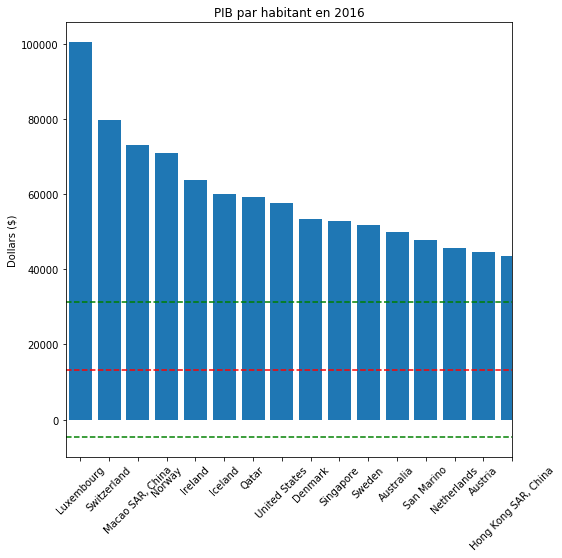

In [45]:
#On fait un graphique en barre des pays les plus riches
name = pays_riches['Country Name']
data = pays_riches['2016']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(8, 8))

#On paramètre les barres avec les données et les labels
ax.bar(name, data)

#On paramètre la ligne de la moyenne
ax.axhline(data.mean(), ls='--', color='r')

#On paramètre la ligne de l'écart-type sup
ax.axhline(data.mean() + data.std(), ls='--', color='g')

#On paramètre la ligne de l'écart-type inf
ax.axhline(data.mean() - data.std(), ls='--', color='g')

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()
#On les réoriente à 45°
plt.setp(labels, rotation=45)

#On paramètre le grtaphique et on l'affiche
ax.set(xlim=[-0.5, 15], ylabel='Dollars ($)',
       title="PIB par habitant en 2016")

#On enregistre le graphique
plt.savefig('PIB.png', transparent = True, dpi = 700)
#plt.close()

In [110]:
#Petits essais avec le mentor
mediane = pays_riches['2016'].median()
mediane

masque = pays_riches['2016'] > mediane
df = pays_riches[masque]
df

liste = df['Country Name'].values
liste

array(['Luxembourg', 'Switzerland', 'Macao SAR, China', 'Norway',
       'Ireland', 'Iceland', 'Qatar', 'United States', 'Denmark',
       'Singapore', 'Sweden', 'Australia', 'San Marino', 'Netherlands',
       'Austria', 'Hong Kong SAR, China', 'Finland', 'Canada', 'Germany',
       'Belgium', 'United Kingdom', 'New Zealand', 'Japan',
       'United Arab Emirates', 'Israel', 'Andorra', 'France', 'Guam',
       'Italy', 'Bahamas, The', 'Korea, Rep.', 'Kuwait',
       'Brunei Darussalam', 'Spain', 'Malta', 'Cyprus', 'Bahrain',
       'Northern Mariana Islands', 'Slovenia', 'Saudi Arabia', 'Portugal',
       'Czech Republic', 'Greece', 'Estonia', 'St. Kitts and Nevis',
       'Slovak Republic', 'Trinidad and Tobago', 'Barbados', 'Uruguay',
       'Seychelles', 'Oman', 'Lithuania', 'Antigua and Barbuda', 'Palau',
       'Latvia', 'Chile', 'Panama', 'Hungary', 'Argentina', 'Poland',
       'Croatia', 'American Samoa', 'Costa Rica', 'Turkey', 'Maldives',
       'Grenada', 'Mauritius', 'Roma

In [50]:
#Nous allons maintenant analyser les évolutions des pays les plus intéressants pour l'entreprise
#Pour cela on commence par trier les 8 pays au plus fort PIB par habitant

analyse_PIB = data_par_pays[data_par_pays['Country Name'].isin(['Luxembourg','Switzerland',\
                                         'Macao SAR, China','Norway','Ireland','Iceland','Qatar','United States'])]

analyse_PIB = analyse_PIB[analyse_PIB['Indicator Code']\
                                          .isin(['SE.TER.ENRL', 'NY.GDP.PCAP.CD',\
                                                 'IT.NET.USER.P2','SE.SEC.ENRL.GC','SP.POP.TOTL'])]

analyse_PIB = analyse_PIB.reset_index(drop=True)

#On enregistre le tableau dans un doc excel
#fichier_excel = pd.ExcelWriter('Analyse_pays.xlsx')
#analyse_PIB.to_excel(fichier_excel, "Sheet1")
#fichier_excel.save()

analyse_PIB

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Iceland,ISL,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,1.807400e+04,1.882300e+04,1.938200e+04,1.992100e+04,1.982900e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,ISL,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,1.706000e+03,1.970000e+03,2.267000e+03,2.429000e+03,2.695000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,ISL,GDP per capita (current US$),NY.GDP.PCAP.CD,2.597387e+03,3.278649e+03,4.047619e+03,5.481730e+03,7.098028e+03,6.506867e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Iceland,ISL,"Population, total",SP.POP.TOTL,2.044380e+05,2.060980e+05,2.091370e+05,2.123170e+05,2.152090e+05,2.179790e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ireland,IRL,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,1.545750e+05,1.617960e+05,1.691760e+05,1.785570e+05,2.476090e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ireland,IRL,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,2.850100e+04,2.951700e+04,3.002000e+04,3.173700e+04,3.789700e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ireland,IRL,GDP per capita (current US$),NY.GDP.PCAP.CD,1.488295e+03,1.705973e+03,2.082957e+03,2.427172e+03,2.519942e+03,2.976961e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ireland,IRL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ireland,IRL,"Population, total",SP.POP.TOTL,2.957250e+06,2.992050e+06,3.036850e+06,3.085950e+06,3.137500e+06,3.189550e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
#Nous allons maintenant analyser les évolutions des pays les plus intéressants pour l'entreprise
#Pour cela on commence par trier les 8 pays au plus fort PIB par habitant

analyse_pays_hyp1 = data_par_pays[data_par_pays['Country Name'].isin(['Luxembourg','Switzerland',\
                                         'Macao SAR, China','Norway','Ireland','Iceland','Qatar','United States'])]

analyse_pays_hyp1 = analyse_pays_hyp1[analyse_pays_hyp1['Indicator Code']\
                                          .isin(['SE.TER.ENRL', 'NY.GDP.PCAP.CD',\
                                                 'IT.NET.USER.P2','SE.SEC.ENRL.GC','SP.POP.TOTL','PRJ.POP.ALL.4.MF'])]

analyse_pays_hyp1 = analyse_pays_hyp1.reset_index(drop=True)

#On enregistre le tableau dans un doc excel
#fichier_excel = pd.ExcelWriter('Analyse_pays_hyp2.xlsx')
#analyse_pays_hyp2.to_excel(fichier_excel, "Sheet1")
#fichier_excel.save()

analyse_pays_hyp1

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Iceland,ISL,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,1.807400e+04,1.882300e+04,1.938200e+04,1.992100e+04,1.982900e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,ISL,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,1.706000e+03,1.970000e+03,2.267000e+03,2.429000e+03,2.695000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,ISL,GDP per capita (current US$),NY.GDP.PCAP.CD,2.597387e+03,3.278649e+03,4.047619e+03,5.481730e+03,7.098028e+03,6.506867e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Iceland,ISL,"Population, total",SP.POP.TOTL,2.044380e+05,2.060980e+05,2.091370e+05,2.123170e+05,2.152090e+05,2.179790e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Iceland,ISL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,240.25,257.56,274.55,290.87,306.09,319.97,332.53,343.94,354.24,NaN
6,Ireland,IRL,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,1.545750e+05,1.617960e+05,1.691760e+05,1.785570e+05,2.476090e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ireland,IRL,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,2.850100e+04,2.951700e+04,3.002000e+04,3.173700e+04,3.789700e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ireland,IRL,GDP per capita (current US$),NY.GDP.PCAP.CD,1.488295e+03,1.705973e+03,2.082957e+03,2.427172e+03,2.519942e+03,2.976961e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ireland,IRL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([<matplotlib.patches.Wedge at 0x2a83c2d9d30>,
 [Text(-0.0560405909330616, 1.1986907241519278, 'Iceland'),
  Text(-0.8271903923758984, 0.8693423116132145, 'Ireland'),
  Text(-1.197721309066874, 0.07391661387762463, 'Luxembourg'),
  Text(-1.1933400289289826, -0.1262520310956431, 'Macao SAR, China'),
  Text(-0.7247308457216247, -0.9564335843432198, 'Norway'),
  Text(0.5134368899783257, -1.0846117093270684, 'Qatar'),
  Text(1.104968489777341, 0.46802204712938755, 'Switzerland')])

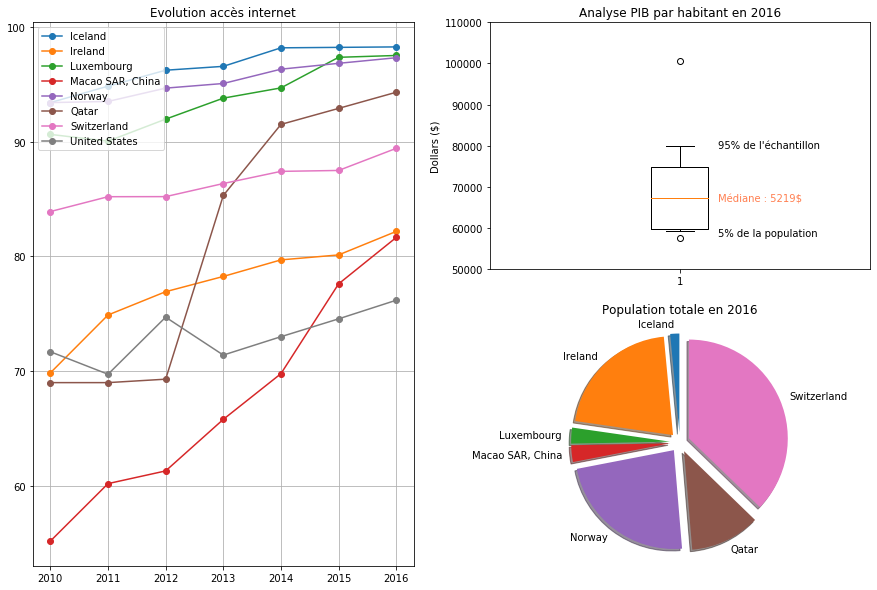

In [367]:
plt.figure(1,figsize=(15, 10))

ax1 = plt.subplot(1, 2, 1)

data = analyse_pays_hyp1.loc[analyse_pays_hyp1['Indicator Code'] == 'IT.NET.USER.P2']
annees = ['2010','2011','2012','2013','2014','2015','2016']

#On trace les courbes de chaque pays
for i in data.itertuples():
    
     ax1.plot(annees, data.loc[i[0],'2010':'2016'],\
                label=data.loc[i[0],'Country Name'], marker = 'o')

#On affiche la grille

ax1.grid(True)
#On paramètre le graphique et on l'affiche
ax1.set(title="Evolution accès internet")

ax1.legend(loc = 'upper left', prop = {'size': 10})
#ax1.text(5.9, 77, '76%', fontsize = 10, color = 'black')
#ax1.text(5.9, 54.5, '53%', fontsize = 10, color = 'black')
#ax1.text(5.7, 30.5, '29.5%', fontsize = 10, color = 'black')

ax2 = plt.subplot(2, 2, 2)

#On construit tout d'abord les données à tracer
#On appelle la fonction qui nous trie le dataset de base en fonction d'un indicateur
data = filtre_indicateur(analyse_pays_hyp1,'NY.GDP.PCAP.CD')

#Ensuite on trie le résultat par ordre décroissant suivant une colonne donnée
#Ici 2016, est la dernière année contenant des données
data = data.sort_values(by = '2016', ascending = False)

#Le tri précédent ayant aussi modifié l'ordre des lignes, on remet l'index du dataframe à 0
data = data.reset_index(drop = True)

#Enfin, on supprime les lignes contenant des valeurs nulles
data = list(data['2016'].dropna())

ax2.boxplot(data,whis=[5,95])

#On paramètre le graphique et on l'affiche
ax2.set(ylim=[50000,110000],title="Analyse PIB par habitant en 2016", ylabel='Dollars ($)')

ax2.text(1.1, 66500, 'Médiane : 5219$', fontsize = 10, color = 'coral')
ax2.text(1.1, 58000, '5% de la population', fontsize = 10, color = 'black')
ax2.text(1.1, 79500, "95% de l'échantillon", fontsize = 10, color = 'black')

#ax2.text(0.52, 58000, 'United States : : 57638.2$', fontsize = 10, color = 'coral')
#ax2.text(0.52, 55000, 'China : 8123.2$', fontsize = 10, color = 'lightskyblue')
#ax2.text(0.52, 52000, 'India : 1710$', fontsize = 10, color = 'lightslategray')

ax3 = plt.subplot(2, 2, 4)


data = analyse_pays_hyp1.loc[analyse_pays_hyp1['Indicator Code'] == 'SP.POP.TOTL']
data = data['2016']
data = data.reset_index(drop=True)
#On enlève les Etats Unis qui sont une valeur abérantes pour le camembert. 
#Ils représentent 95% de l'échantillon,du coup on ne voit pas les autres pays dans le graphique.
data = data.drop(7,axis=0)

labels = analyse_pays_hyp1['Country Name'].unique()
labels = np.delete(labels, (7), axis=0)

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

ax3.set(title="Population totale en 2016")
ax3.pie(data, explode=explode, shadow=True, startangle=90, labels = labels)
#ax3.legend(bbox_to_anchor = (1, 1), loc = 'best', labels=labels)

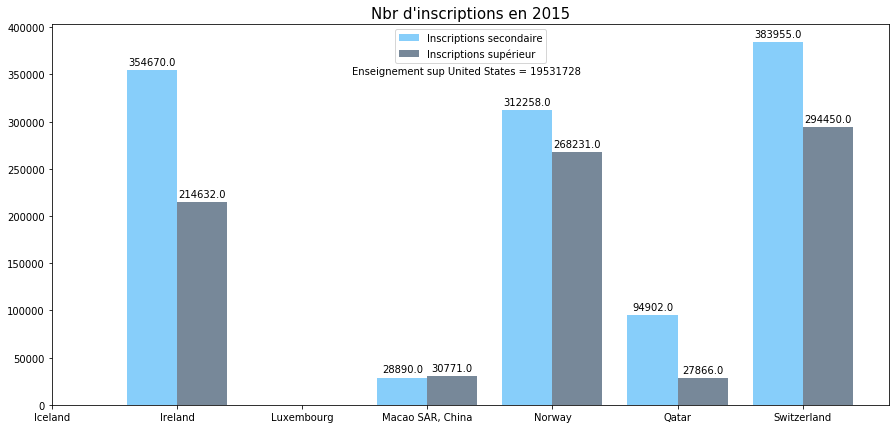

In [389]:
#On crée un graphique pour visualiser le nombre d'inscriptions au secondaire et supérieur

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(15, 7))

name = analyse_pays_hyp1['Country Name'].unique()

#On construit les barres pour le secondaire
inscriptions_sec = analyse_pays_hyp1.loc[analyse_pays_hyp1['Indicator Code'] == 'SE.SEC.ENRL.GC']
inscriptions_sec = inscriptions_sec['2015']
#On enlève les Etats Unis qui sont une valeur abérantes pour l'échantillon
inscriptions_sec = inscriptions_sec.reset_index(drop=True)
inscriptions_sec = inscriptions_sec.drop(7,axis=0)

inscriptions_sup = analyse_pays_hyp1.loc[analyse_pays_hyp1['Indicator Code'] == 'SE.TER.ENRL']
inscriptions_sup = inscriptions_sup['2015']
#On enlève les Etats Unis qui sont une valeur abérantes pour l'échantillon
inscriptions_sup = inscriptions_sup.reset_index(drop=True)
inscriptions_sup = inscriptions_sup.drop(7,axis=0)

barWidth = 0.4
position_sec = range(len(inscriptions_sec))
position_sup = [x + barWidth for x in position_sec]

bar1 = ax.bar(position_sec, inscriptions_sec, width = barWidth, color = 'lightskyblue')
bar2 = ax.bar(position_sup, inscriptions_sup, width = barWidth, color = 'lightslategray')

plt.xticks([r + barWidth / 2 for r in range(len(inscriptions_sec))], name)

plt.title("Nbr d'inscriptions en 2015", size=15)
ax.legend(['Inscriptions secondaire','Inscriptions supérieur'], loc = "upper center")
ax.text(2.6, 350000, 'Enseignement sup United States = 19531728', fontsize = 10, color = 'black')

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(bar1, "center")
autolabel(bar2, "center")

In [390]:
data = analyse_pays_hyp1.loc[analyse_pays_hyp1['Indicator Code'] == 'PRJ.POP.ALL.4.MF']
#On enlève les Etats Unis qui sont une valeur abérantes pour le camembert. 
#Ils représentent 95% de l'échantillon,du coup on ne voit pas les autres pays dans le graphique.
data = data.reset_index(drop=True)
data['2050']

0       205.37
1      3453.16
2       278.08
3       350.75
4      2765.30
5       893.25
6      2727.07
7    145446.92
Name: 2050, dtype: float64

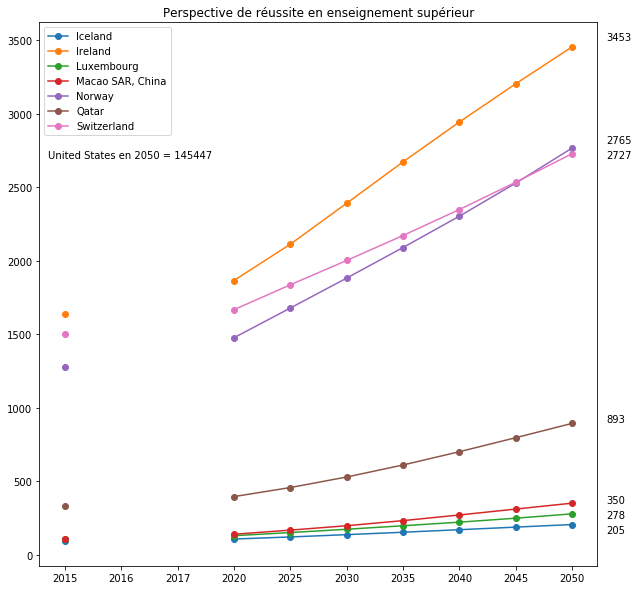

In [394]:
#On trace l'évolution du taux d'accès à internet de chaque pays

data = analyse_pays_hyp1.loc[analyse_pays_hyp1['Indicator Code'] == 'PRJ.POP.ALL.4.MF']
#On enlève les Etats Unis qui sont une valeur abérantes pour le camembert. 
#Ils représentent 95% de l'échantillon,du coup on ne voit pas les autres pays dans le graphique.
data = data.reset_index(drop=True)
data = data.drop(7,axis=0)

annees = ['2015','2016','2017','2020','2025','2030','2035','2040','2045','2050']

fig, ax = plt.subplots(figsize=(10, 10))

#On trace les courbes de chaque pays
for i in data.itertuples():
    
    ax.plot(annees, data.loc[i[0],'2015':'2050'],\
            label=data.loc[i[0],'Country Name'],marker='o')

ax.legend(loc = 'upper left', prop = {'size': 10})
ax.text(9.6, 3500, '3453', fontsize = 10, color = 'black')
ax.text(9.6, 2800, '2765', fontsize = 10, color = 'black')
ax.text(9.6, 2700, '2727', fontsize = 10, color = 'black')
ax.text(9.6, 900, '893', fontsize = 10, color = 'black')
ax.text(9.6, 350, '350', fontsize = 10, color = 'black')
ax.text(9.6, 250, '278', fontsize = 10, color = 'black')
ax.text(9.6, 150, '205', fontsize = 10, color = 'black')
ax.text(-0.3, 2700, 'United States en 2050 = 145447', fontsize = 10, color = 'black')

#On paramètre le graphique et on l'affiche
ax.set(title="Perspective de réussite en enseignement supérieur")

#On enregistre le graphique
plt.savefig('evol_pop_ens_sup.png', transparent = True, dpi = 700)

plt.show()

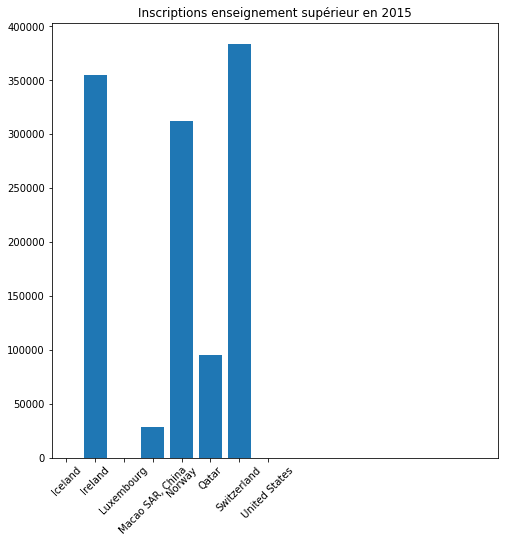

In [52]:
#On fait une analyse des 8 premiers pays des inscriptions en enseignement secondaire

df = analyse_PIB.loc[analyse_PIB['Indicator Code'] == 'SE.SEC.ENRL.GC']

name = df['Country Name']
data = df['2015']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(8, 8))

#On paramètre les barres avec les données et les labels
ax.bar(name, data)

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()

#On les réoriente à 45°
plt.setp(labels, rotation=45)

#On paramètre le grtaphique et on l'affiche
ax.set(xlim=[-0.5, 15], title="Inscriptions enseignement supérieur en 2015")

#On enregistre le graphique
plt.savefig('Nbr_inscription_ens_sup.png', transparent = True, dpi = 700)
#plt.close()

In [54]:
#CETTE PARTIE EST UNE ANALYSE DES TAUX D'ACCES A INTERNET PAR PAYS

#On recherche l'indicateur qui contient le taux d'accès à internet
#Pour analyser le taux de remplissage des données
acces_internet = recherche_indicateur(data_par_pays,'IT.NET.USER.P2')
acces_internet = acces_internet.sort_values(by = 'Taux de remplissage', ascending = False)
acces_internet.head()

,Pays,Code Indicateur,Taux de remplissage
0,Afghanistan,IT.NET.USER.P2,100.0
141,Oman,IT.NET.USER.P2,100.0
129,Mozambique,IT.NET.USER.P2,100.0
130,Myanmar,IT.NET.USER.P2,100.0
131,Namibia,IT.NET.USER.P2,100.0


In [55]:
#On calcule la moyenne des données
moy_taux_acc_int = acces_internet['Taux de remplissage'].mean()
moy_taux_acc_int

96.97802197802199

In [56]:
#On recherche l'indicateur qui identifie les accès internet par pays
acces_internet = filtre_indicateur(data_par_pays,'IT.NET.USER.P2')
acces_internet

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Algeria,DZA,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103995,American Samoa,ASM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111325,Angola,AGO,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114990,Antigua and Barbuda,ATG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118655,Argentina,ARG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122320,Armenia,ARM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125985,Aruba,ABW,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#On calcule la moyenne de taux d'accès à internet pour l'année 2016 qui est l'année avec le plus de données exploitables
moyenne_internet = acces_internet['2016'].mean()
moyenne_internet

51.41452271657214

In [58]:
#Une fois que la moyenne a été calculée, nous pouvons rechercher les pays au-dessus de cette moyenne
pays_sup = acces_internet[acces_internet['2016'] > moyenne_internet]
pays_sup.shape

(105, 70)

In [59]:
#et ceux qui sont en-dessous
pays_inf = acces_internet[acces_internet['2016'] < moyenne_internet]
pays_inf.shape

(96, 70)

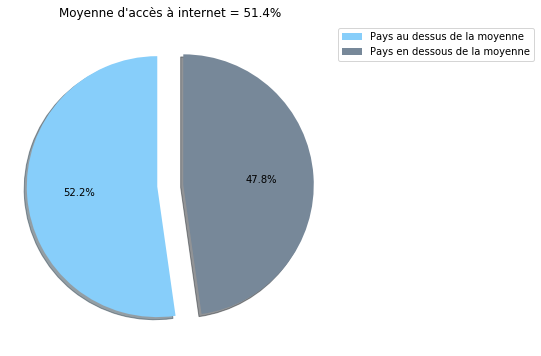

In [69]:
#On trace un graphique pour illustrer l'état des lieu des moyennes

fig, ax = plt.subplots(figsize=(6, 6))

labels = 'Pays au dessus de la moyenne', 'Pays en dessous de la moyenne'
sizes = [pays_sup.shape[0], pays_inf.shape[0]]
explode = (0.1, 0.1,)
colors = ['lightskyblue', 'lightslategray',]

plt.title("Moyenne d'accès à internet = 51.4%")
plt.pie(sizes, explode=explode, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)
plt.legend(bbox_to_anchor = (1, 1), loc = 'best', labels=labels)

#plt.axis('equal')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('Moyenne_internet.png',transparent=True)
plt.show()

In [70]:
#On classe les pays par ordre croissant d'accès à internet
acces_internet = acces_internet.sort_values(by = '2016', ascending = False)
acces_internet.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
411855,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


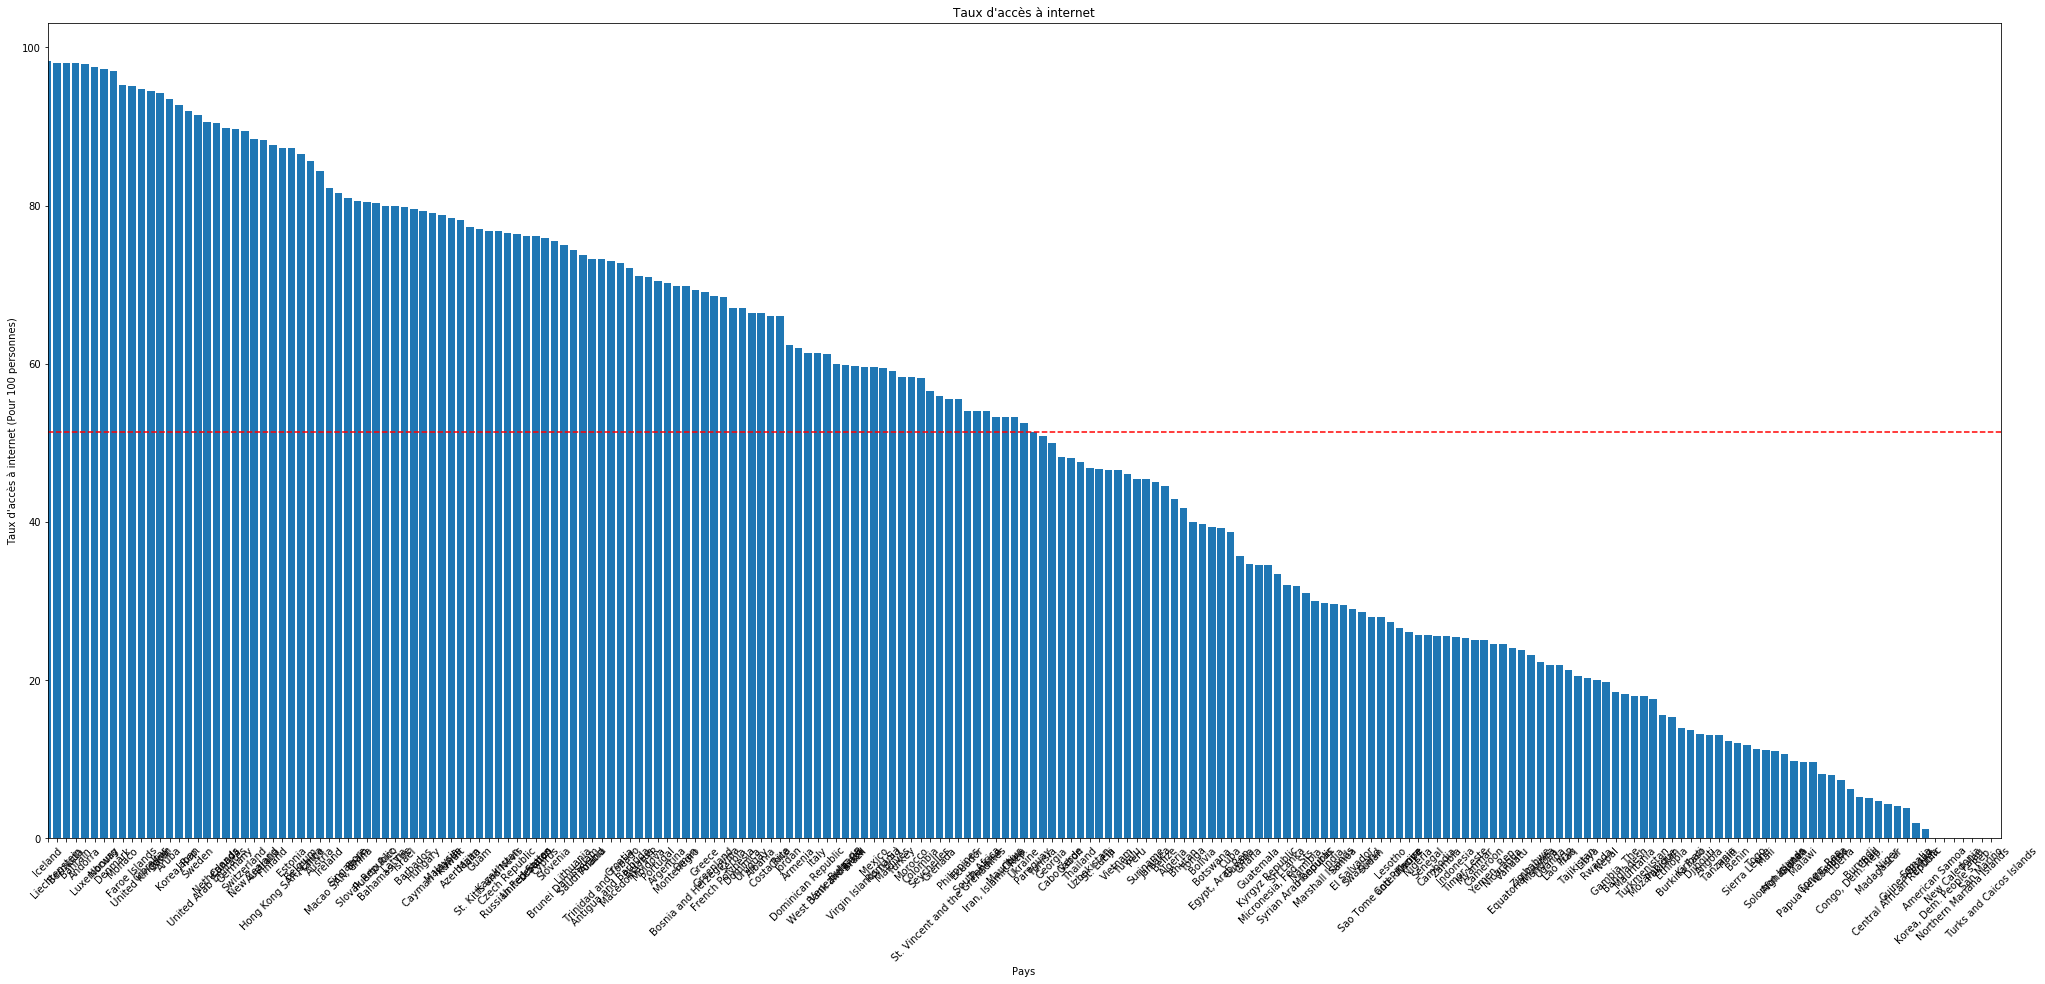

In [72]:
#On crée un graphique en barres verticales avec la moyenne pour visualiser quels sont pays au-dessus et en-dessous
name = acces_internet['Country Name']
data = acces_internet['2016']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(35, 15))

#On paramètre les barres avec les données et les labels
ax.bar(name, data)

#On paramètre la ligne de la moyenne
ax.axhline(moyenne_internet, ls='--', color='r')

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()
#On les réoriente à 45°
plt.setp(labels, rotation=45)

#On paramètre le grtaphique et on l'affiche
ax.set(xlim=[0, acces_internet.shape[0]], xlabel='Pays', ylabel="Taux d'accès à internet (Pour 100 personnes)",
       title="Taux d'accès à internet")

#On enregistre le graphique
plt.savefig('Acces_internet.png', transparent = True, dpi = 700)
#plt.close()

## Nous allons rechercher tous les indicateurs ayant un rapport avec l'enseignement secondaire.
Le but est de rechercher les indicateurs avec le plus de remplissage de données pour faire une analyse la plus juste possible.

In [398]:
#Nous allons créer un tableau contenant tous les indicateurs se rapportant au secondaire avec le taux de 
#remplissage de données pour chaque indicateur.
indicateurs_secondaires_total = pd.DataFrame(columns=['Pays','Code Indicateur','Taux de remplissage'])

#Nous bouclons sur la liste des régions
for i in data_par_pays.itertuples():
    
    if 'SE.SEC.' in data_par_pays.loc[i[0],'Indicator Code']:

        #On analyse les données sur 8 colonnes de 2010 à 2017
        nbr_donnees_totales = 8
        nbr_donnees_nulles = data_par_pays.loc[i[0],'2010':'2017'].isnull().sum().sum()
        taux_remplissage_indicateur = 100-(nbr_donnees_nulles / nbr_donnees_totales)*100
        
        #On incrémente ensuite le tableau de sortie
        indicateurs_secondaires_total = \
            indicateurs_secondaires_total.append({'Pays':data_par_pays.loc[i[0],'Country Name'], \
                                            'Code Indicateur':data_par_pays.loc[i[0],'Indicator Code'], \
                                            'Taux de remplissage':taux_remplissage_indicateur}, ignore_index=True)

indicateurs_secondaires_total.head()

,Pays,Code Indicateur,Taux de remplissage
0,Afghanistan,SE.SEC.PROG.ZS,0.0
1,Afghanistan,SE.SEC.PROG.FE.ZS,0.0
2,Afghanistan,SE.SEC.PROG.MA.ZS,0.0
3,Afghanistan,SE.SEC.ENRL,75.0
4,Afghanistan,SE.SEC.ENRL.FE,75.0


In [402]:
indic_sec_unique = indicateurs_secondaires_total['Code Indicateur'].unique().tolist()
len(indic_sec_unique)

42

In [74]:
#Calcul du taux de remplissage par indicateur
indic_sec_unique = indicateurs_secondaires_total['Code Indicateur'].unique().tolist()

tab_moy_indic_sec = pd.DataFrame(columns=['Code Indicateur', 'Moyenne'])

for i in range(len(indic_sec_unique)):
    masque = indicateurs_secondaires_total[indicateurs_secondaires_total['Code Indicateur'] == \
                                           indic_sec_unique[i]]
    
    moyenne = masque['Taux de remplissage'].mean()
    
    #On incrémente ensuite le tableau de sortie
    tab_moy_indic_sec = \
        tab_moy_indic_sec.append({'Code Indicateur':indic_sec_unique[i], \
                                        'Moyenne':moyenne}, ignore_index=True)    

tab_moy_indic_sec = tab_moy_indic_sec.sort_values(by = 'Moyenne', ascending = False)
tab_moy_indic_sec.head()

,Code Indicateur,Moyenne
37,SE.SEC.DURS,85.548780
38,SE.SEC.DURS.UP,83.911483
36,SE.SEC.DURS.LO,83.911483
24,SE.SEC.AGES,83.911483
9,SE.SEC.ENRR.LO,58.035714


In [75]:
moyenne_indic_sec = tab_moy_indic_sec['Moyenne'].mean()
moyenne_indic_sec

50.410355613487866

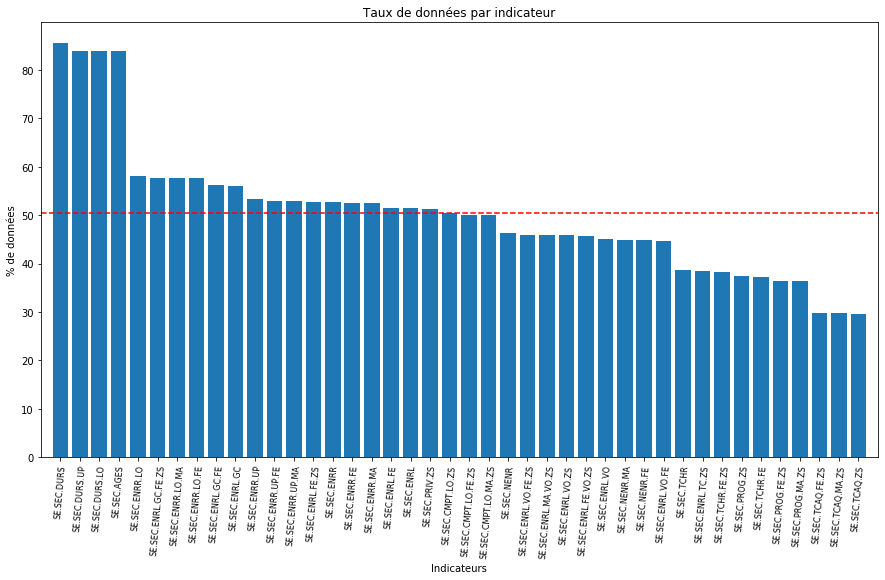

In [76]:
#On crée un graphique en barres verticales avec la moyenne pour visualiser quels sont pays au-dessus et en-dessous
name = tab_moy_indic_sec['Code Indicateur']
data = tab_moy_indic_sec['Moyenne']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(15, 8))

#On paramètre les barres avec les données et les labels
ax.bar(name, data)

#On paramètre la ligne de la moyenne
ax.axhline(moyenne_indic_sec, ls='--', color='r')

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()

#On les réoriente à 85°
plt.setp(labels, rotation=85)

#On modifie la taille de police des labels
plt.xticks(fontsize=8)

#On paramètre le grtaphique et on l'affiche
ax.set(xlim=[-1, tab_moy_indic_sec.shape[0]], xlabel='Indicateurs', ylabel='% de données',
       title="Taux de données par indicateur")

#On enregistre le graphique
plt.savefig('Indic_ens_sec.png', transparent = True, dpi = 700)

In [77]:
#On recherche quels sont les noms des indicateurs les plus remplis
nom_indic_sec = data_par_pays[data_par_pays['Indicator Code'].isin(['SE.SEC.DURS', 'SE.SEC.DURS.UP',\
                                                                    'SE.SEC.DURS.LO','SE.SEC.AGES'])]
nom_indic_sec = data_par_pays.loc[:, 'Indicator Code']

In [78]:
len(indic_sec_unique)

42

## On va analyser maintenant les pays avec un indicateur important pour l'analyse :

Le plus fort taux d'inscription au secondaire : SE.SEC.ENRL.GC

Attention cependant, le remplissage de cet indicateur s'arrête en 2015!

In [79]:
#On recherche l'indicateur
inscription_secondaire = data_par_pays.loc[data_par_pays['Indicator Code'] ==  'SE.SEC.ENRL.GC',:]
inscription_secondaire.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92822,Afghanistan,AFG,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,107609.0,127162.0,146988.0,159464.0,167397.0,179763.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#Nous allons analyser l'évolution du taux de données pour cet indicateur

#Nous créons un nouveau dataframe dans lequel seront stockés les résultats
tab_taux = pd.DataFrame(columns=['Année','taux de données (%)'])

#Nous bouclons sur les colonnes correspondant aux années
j=2010

while j <= 2017:
    
    nbr_donnees_totales = inscription_secondaire.shape[0]

    nbr_donnees_nulles = inscription_secondaire.loc[:,str(j)].isnull().sum().sum()

    taux_remplissage_secondaire = 100-(nbr_donnees_nulles / nbr_donnees_totales)*100

    tab_taux = \
        tab_taux.append({'Année':j,'taux de données (%)':taux_remplissage_secondaire}, ignore_index=True)    
    j+=1

print(tab_taux)

    Année  taux de données (%)
0  2010.0            74.407583
1  2011.0            77.251185
2  2012.0            77.251185
3  2013.0            73.933649
4  2014.0            73.933649
5  2015.0            66.350711
6  2016.0             5.687204
7  2017.0             0.000000


In [81]:
#On tri dans l'ordre décroissant les pays avec le plus d'inscriptions
inscription_secondaire= inscription_secondaire.sort_values(by = '2015', ascending = False)
inscription_secondaire.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
415342,India,IND,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,20924504.0,21736480.0,22598960.0,NaN,24263480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243087,China,CHN,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,20214900.0,26418500.0,31276100.0,35824400.0,34464300.0,36503600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188112,Brazil,BRA,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,3055652.0,3992048.0,4943407.0,5270588.0,6958947.0,7560303.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419007,Indonesia,IDN,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,1815645.0,1955806.0,2102558.0,2246893.0,2400044.0,2709953.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147797,Bangladesh,BGD,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,NaN,1930345.0,2255750.0,2366148.0,2442842.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#On calcule la moyenne d'inscriptions au secondaire pour l'année 2015 qui est l'année avec le plus de données exploitables
moyenne_secondaire = inscription_secondaire['2015'].mean()
moyenne_secondaire

2930014.063169643

In [84]:
#Une fois que la moyenne a été calculée, nous pouvons rechercher les pays au-dessus de cette moyenne
pays_sup_secondaire = inscription_secondaire[inscription_secondaire['2015'] > moyenne_secondaire]
pays_sup_secondaire.shape

(20, 70)

In [85]:
#et ceux qui sont en-dessous
pays_inf_secondaire = inscription_secondaire[inscription_secondaire['2015'] < moyenne_secondaire]
pays_inf_secondaire.shape

(120, 70)

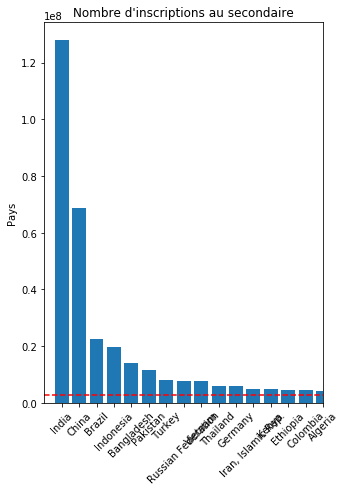

In [86]:
#On crée un graphique en barres verticales avec la moyenne pour visualiser quels sont pays au-dessus et en-dessous

#On ne va analyser que les 15 premiers pays
#On reset l'index avant. Pour que l'ordre des pays soit concordant dans le graphique.
inscription_secondaire = inscription_secondaire.reset_index(drop=True)

name = inscription_secondaire['Country Name']
data = inscription_secondaire['2015']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(5, 7))

#On paramètre les barres avec les données et les labels
ax.bar(name, data, width=0.8)

#On paramètre la ligne de la moyenne
ax.axhline(moyenne_secondaire, ls='--', color='r')

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()

#On les réoriente à 45°
plt.setp(labels, rotation=45)

#On paramètre le graphique et on l'affiche
ax.set(xlim=[-1, 15],  ylabel='Pays',
       title="Nombre d'inscriptions au secondaire")

#On enregistre le graphique
plt.savefig('inscriptions_secondaire.png', transparent = True, dpi = 700)
#plt.close()

L'inde et la Chine ressortent nettement de l'analyse précédente.

Voyons maintenant l'évolution du nombre d'inscriptions au fil des années.

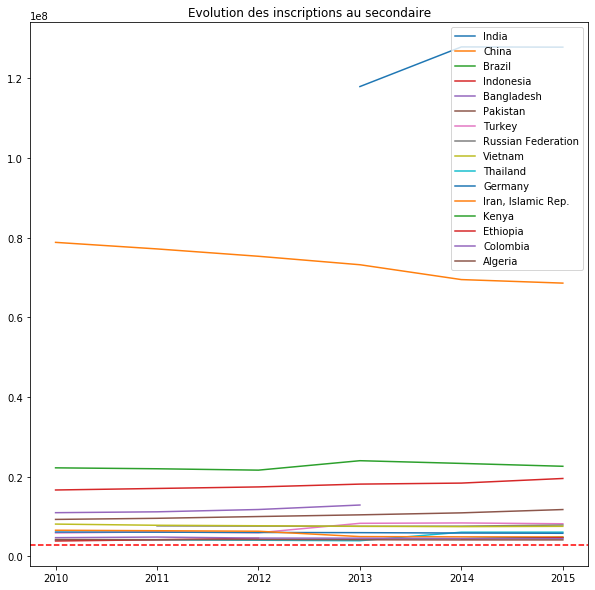

In [87]:
#On trace l'évolution du taux d'accès à internet de chaque pays

data = inscription_secondaire.loc[:15,:]
annees = ['2010','2011','2012','2013','2014','2015','2016']

fig, ax = plt.subplots(figsize=(10, 10))

#On trace les courbes de chaque pays
for i in data.itertuples():
    
    ax.plot(annees, data.loc[i[0],'2010':'2016'],\
            label=data.loc[i[0],'Country Name'])

#On paramètre la ligne de la moyenne
ax.axhline(moyenne_secondaire, ls='--', color='r')

#On paramètre le graphique et on l'affiche
ax.set(title="Evolution des inscriptions au secondaire")
ax.legend()

#On enregistre le graphique
plt.savefig('evolution_secondaire.png', transparent = True, dpi = 700)

plt.show()


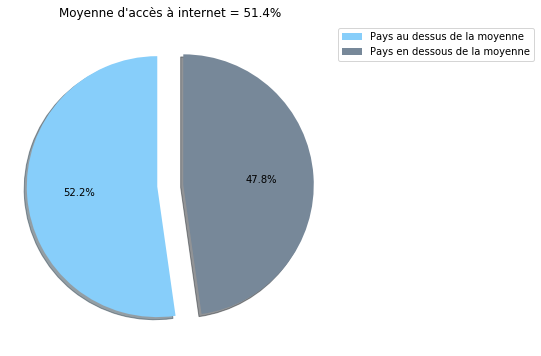

In [91]:
#On trace un graphique pour illustrer l'état des lieu des inscriptions au secondaire

fig, ax = plt.subplots(figsize=(6, 6))

labels = 'Pays au dessus de la moyenne', 'Pays en dessous de la moyenne'
sizes = [pays_sup.shape[0], pays_inf.shape[0]]
explode = (0.1, 0.1,)
colors = ['lightskyblue', 'lightslategray',]

plt.title("Moyenne d'accès à internet = 51.4%")
plt.pie(sizes, explode=explode, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)
plt.legend(bbox_to_anchor = (1, 1), loc = 'best', labels=labels)

#plt.axis('equal')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('Moyenne_secondaire.png',transparent=True)
plt.show()

## Après le secondaire, nous allons analyser l'enseignement supérieur. La cible directe de l'entreprise.

In [92]:
#Nous allons créer un tableau contenant tous les indicateurs se rapportant au secondaire avec le taux de 
#remplissage de données pour chaque indicateur.
indicateurs_ens_sup_total = pd.DataFrame(columns=['Pays','Code Indicateur','Taux de remplissage'])

#Nous bouclons sur la liste des régions
for i in data_par_pays.itertuples():
    
    if 'SE.TER.' in data_par_pays.loc[i[0],'Indicator Code']:

        #On analyse les données sur 8 colonnes de 2010 à 2017
        nbr_donnees_totales = 8
        nbr_donnees_nulles = data_par_pays.loc[i[0],'2010':'2017'].isnull().sum().sum()
        taux_remplissage_indicateur = 100-(nbr_donnees_nulles / nbr_donnees_totales)*100
        
        #On incrémente ensuite le tableau de sortie
        indicateurs_ens_sup_total = \
            indicateurs_ens_sup_total.append({'Pays':data_par_pays.loc[i[0],'Country Name'], \
                                            'Code Indicateur':data_par_pays.loc[i[0],'Indicator Code'], \
                                            'Taux de remplissage':taux_remplissage_indicateur}, ignore_index=True)

indicateurs_ens_sup_total.head()

,Pays,Code Indicateur,Taux de remplissage
0,Afghanistan,SE.TER.ENRL,25.0
1,Afghanistan,SE.TER.ENRL.FE,25.0
2,Afghanistan,SE.TER.GRAD,12.5
3,Afghanistan,SE.TER.GRAD.FE,12.5
4,Afghanistan,SE.TER.ENRR,25.0


In [93]:
#Calcul du taux de remplissage par indicateur
indic_ens_sup_unique = indicateurs_ens_sup_total['Code Indicateur'].unique().tolist()

tab_moy_indic_ens_sup = pd.DataFrame(columns=['Code Indicateur', 'Moyenne'])

for i in range(len(indic_sec_unique)):
    masque = indicateurs_ens_sup_total[indicateurs_ens_sup_total['Code Indicateur'] == \
                                           indic_ens_sup_unique[i]]
    
    moyenne = masque['Taux de remplissage'].mean()
    
    #On incrémente ensuite le tableau de sortie
    tab_moy_indic_ens_sup = \
        tab_moy_indic_ens_sup.append({'Code Indicateur':indic_ens_sup_unique[i], \
                                        'Moyenne':moyenne}, ignore_index=True)    

tab_moy_indic_ens_sup = tab_moy_indic_ens_sup.sort_values(by = 'Moyenne', ascending = False)
tab_moy_indic_ens_sup.head()

,Code Indicateur,Moyenne
7,SE.TER.PRIV.ZS,49.176647
19,SE.TER.ENRL.FE.ZS,48.989899
0,SE.TER.ENRL,48.953202
4,SE.TER.ENRR,48.840206
5,SE.TER.ENRR.FE,48.177083


In [94]:
moyenne_indic_sup = tab_moy_indic_ens_sup['Moyenne'].mean()
moyenne_indic_sup

36.25818546658011

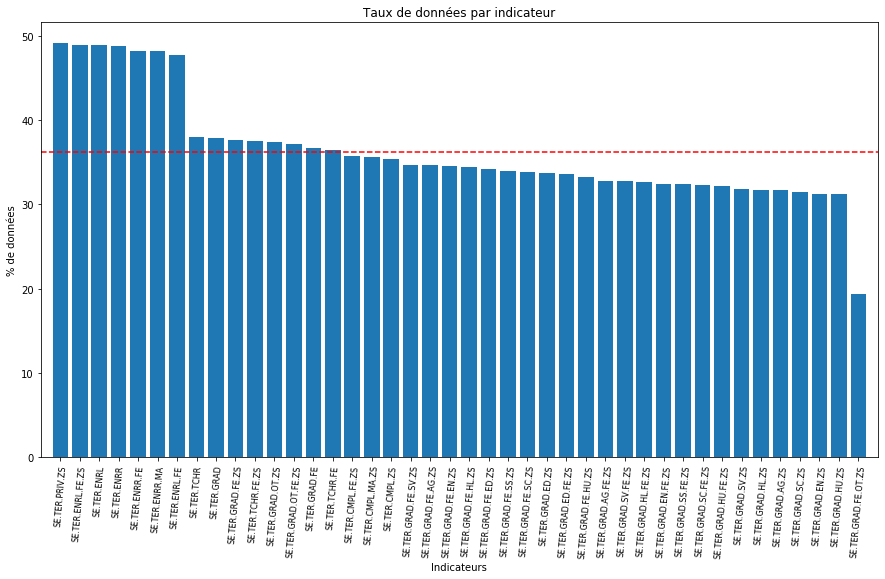

In [95]:
#On crée un graphique en barres verticales avec la moyenne pour visualiser quels sont pays au-dessus et en-dessous
name = tab_moy_indic_ens_sup['Code Indicateur']
data = tab_moy_indic_ens_sup['Moyenne']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(15, 8))

#On paramètre les barres avec les données et les labels
ax.bar(name, data)

#On paramètre la ligne de la moyenne
ax.axhline(moyenne_indic_sup, ls='--', color='r')

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()

#On les réoriente à 85°
plt.setp(labels, rotation=85)

#On modifie la taille de police des labels
plt.xticks(fontsize=8)

#On paramètre le grtaphique et on l'affiche
ax.set(xlim=[-1, tab_moy_indic_ens_sup.shape[0]], xlabel='Indicateurs', ylabel='% de données',
       title="Taux de données par indicateur")

#On enregistre le graphique
plt.savefig('Indic_ens_sup.png', transparent = True, dpi = 700)

In [96]:
#On recherche quels sont les noms des indicateurs les plus remplis
nom_indic_sup = data_par_pays[data_par_pays['Indicator Code'].isin(['SE.TER.PRIV.ZS', 'SE.TER.ENRL.FE.ZS',\
                                                                    'SE.TER.ENRL','SE.TER.ENRR'])]
nom_indic_sup.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7732.00000,9409.00000,9817.00000,11487.00000,10956.00000,12256.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,0.76817,0.92394,0.95241,1.09745,1.02620,1.08012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93482,Afghanistan,AFG,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93675,Afghanistan,AFG,Percentage of students in tertiary education w...,SE.TER.ENRL.FE.ZS,14.67926,NaN,13.34420,15.44354,13.64549,13.71573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96494,Albania,ALB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,25469.00000,28668.00000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
len(indic_ens_sup_unique)

43

## On va analyser maintenant les pays avec un indicateur important pour l'analyse :

Le plus fort taux d'inscription en enseignement supérieur : SE.TER.ENRL

Attention cependant, le remplissage de cet indicateur s'arrête en 2015!

In [98]:
#On va analyser maintenant les pays avec le plus fort taux d'inscription en enseignement supérieur.
#On recherche l'indicateur qui identifie les inscriptions par pays
enseignement_superieur = data_par_pays.loc[data_par_pays['Indicator Code'] ==  'SE.TER.ENRL',:]
enseignement_superieur.shape

(203, 70)

In [101]:
#On tri dans l'ordre décroissant les pays avec le plus d'inscriptions
enseignement_superieur= enseignement_superieur.sort_values(by = '2015', ascending = False)
enseignement_superieur.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
243094,China,CHN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,108617.0,NaN,NaN,193719.0,313645.0,429981.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415349,India,IND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,2472963.0,NaN,2773148.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847819,United States,USA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,8498117.0,8948645.0,9297787.0,9602123.0,10223729.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188119,Brazil,BRA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,430473.0,569230.0,696215.0,785159.0,954674.0,1089808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679229,Russian Federation,RUS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5212600.0,5277900.0,5308700.0,5356500.0,5403300.0,5470900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
#Nous allons analyser l'évolution du taux de données pour cet indicateur

#Nous créons un nouveau dataframe dans lequel seront stockés les résultats
tab_taux_superieur = pd.DataFrame(columns=['Année','taux de données (%)'])

#Nous bouclons sur les colonnes correspondant aux années
j=2010

while j <= 2017:
    
    nbr_donnees_totales = enseignement_superieur.shape[0]

    nbr_donnees_nulles = enseignement_superieur.loc[:,str(j)].isnull().sum().sum()

    taux_remplissage_superieur = 100-(nbr_donnees_nulles / nbr_donnees_totales)*100

    tab_taux_superieur = \
        tab_taux_superieur.append({'Année':j,'taux de données (%)':taux_remplissage_superieur}, ignore_index=True)    
    j+=1

print(tab_taux_superieur)

    Année  taux de données (%)
0  2010.0            68.965517
1  2011.0            69.950739
2  2012.0            69.458128
3  2013.0            64.532020
4  2014.0            61.083744
5  2015.0            54.187192
6  2016.0             3.448276
7  2017.0             0.000000


In [103]:
#On calcule la moyenne d'inscriptions en enseignement supérieur pour l'année 2015 qui est l'année 
#avec un taux de données exploitables
moyenne_ens_sup = enseignement_superieur['2015'].mean()
moyenne_ens_sup

1573104.5053977272

In [104]:
#Une fois que la moyenne a été calculée, nous pouvons rechercher les pays au-dessus de cette moyenne
moyenne_ens_sup_sup = enseignement_superieur[enseignement_superieur['2015'] > moyenne_ens_sup]
moyenne_ens_sup_sup.shape

(18, 70)

In [105]:
#Une fois que la moyenne a été calculée, nous pouvons rechercher les pays au-dessus de cette moyenne
moyenne_ens_sup_inf = enseignement_superieur[enseignement_superieur['2015'] < moyenne_ens_sup]
moyenne_ens_sup_inf.shape

(92, 70)

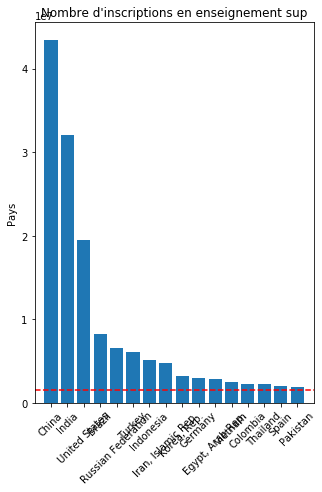

In [106]:
#On crée un graphique en barres verticales avec la moyenne pour visualiser quels sont pays au-dessus et en-dessous

#On ne va analyser que les 5 premiers pays
#On reset l'index avant. Cela permettra de récupérer suelement les 5 premières lignes
enseignement_superieur = enseignement_superieur.reset_index(drop=True)
enseignement_superieur = enseignement_superieur.loc[:15,:]

name = enseignement_superieur['Country Name']
data = enseignement_superieur['2015']

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(5, 7))

#On paramètre les barres avec les données et les labels
ax.bar(name, data, width=0.8)


#On paramètre la ligne de la moyenne
ax.axhline(moyenne_ens_sup, ls='--', color='r')

#On dit que les labels vont sur l'axe X
labels = ax.get_xticklabels()

#On les réoriente à 45°
plt.setp(labels, rotation=45)

#On paramètre le graphique et on l'affiche
ax.set(xlim=[-1, enseignement_superieur.shape[0]],  ylabel='Pays',
       title="Nombre d'inscriptions en enseignement sup")

#On enregistre le graphique
plt.savefig('inscriptions_ens_sup.png', transparent = True, dpi = 700)
#plt.close()

L'inde et la Chine ressortent nettement de l'analyse précédente.

Voyons maintenant l'évolution du nombre d'inscriptions au fil des années.

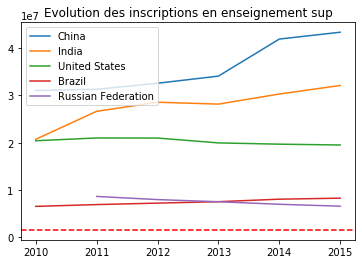

In [107]:
#On va superposer l'évolution des inscriptions au secondare des 5 pays à fort potentiel

pays_1 = enseignement_superieur.loc[0,'2010':'2016']
pays_2 = enseignement_superieur.loc[1,'2010':'2016']
pays_3 = enseignement_superieur.loc[2,'2010':'2016']
pays_4 = enseignement_superieur.loc[3,'2010':'2016']
pays_5 = enseignement_superieur.loc[4,'2010':'2016']

annees = ['2010','2011','2012','2013','2014','2015','2016']

fig, ax = plt.subplots()
ax.plot(annees, pays_1, label=enseignement_superieur.loc[0,'Country Name'])
ax.plot(annees, pays_2, label=enseignement_superieur.loc[1,'Country Name'])
ax.plot(annees, pays_3, label=enseignement_superieur.loc[2,'Country Name'])
ax.plot(annees, pays_4, label=enseignement_superieur.loc[3,'Country Name'])
ax.plot(annees, pays_5, label=enseignement_superieur.loc[4,'Country Name'])

#On paramètre la ligne de la moyenne
ax.axhline(moyenne_ens_sup, ls='--', color='r')

#On paramètre le graphique et on l'affiche
ax.set(title="Evolution des inscriptions en enseignement sup")

ax.legend()

#On enregistre le graphique
plt.savefig('evolution_ens_sup.png', transparent = True, dpi = 700)

plt.show()


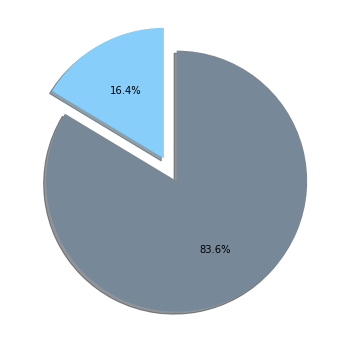

In [108]:
#On trace un graphique pour illustrer l'état des lieu des inscriptions en enseignement sup

fig, ax = plt.subplots(figsize=(6, 6))

#labels = 'Pays au dessus de la moyenne', 'Pays en dessous de la moyenne'
sizes = [moyenne_ens_sup_sup.shape[0], moyenne_ens_sup_inf.shape[0]]
explode = (0.1, 0.1,)
colors = ['lightskyblue', 'lightslategray',]

#plt.title("Moyenne d'accès à internet = 51.4%")
plt.pie(sizes, explode=explode, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)

#plt.axis('equal')

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('Moyenne_ens_sup.png',transparent=True)
plt.show()

In [80]:
enseignement_superieur

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,China,CHN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,108617.0,NaN,NaN,193719.0,313645.0,429981.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,2472963.0,NaN,2773148.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,USA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,8498117.0,8948645.0,9297787.0,9602123.0,10223729.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,BRA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,430473.0,569230.0,696215.0,785159.0,954674.0,1089808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Russian Federation,RUS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5212600.0,5277900.0,5308700.0,5356500.0,5403300.0,5470900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkey,TUR,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,169793.0,169672.0,172075.0,185285.0,263990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Après analyse du secondaire et du supérieur, il ressort 3 pays :
 - La Chine
 - L'inde
 - Les Etats-Unis (Il n'y a pas de données dans le dataset pour le secondaire)

## Nous allons maintenant sortir une fiche plus détaillée de ces 3 pays contenant :
 - La population totale
 - L'accès à internet
 - Le taux d'inscription en enseignement secondaire
 - Le taux d'inscription en enseignement sup
 - Le PIB par habitant


In [182]:
#Nous allons maintenant analyser les évolutions des pays les plus intéressants pour l'entreprise
#Pour cela on commence par trier les 8 pays au plus fort PIB par habitant

analyse_pays_hyp2 = data_par_pays[data_par_pays['Country Name'].isin(['India','China','United States'])]

analyse_pays_hyp2 = analyse_pays_hyp2[analyse_pays_hyp2['Indicator Code']\
                                          .isin(['SE.TER.ENRL', 'NY.GDP.PCAP.CD',\
                                                 'IT.NET.USER.P2','SE.SEC.ENRL.GC','SP.POP.TOTL'])]

analyse_pays_hyp2 = analyse_pays_hyp2.reset_index(drop=True)

#On enregistre le tableau dans un doc excel
#fichier_excel = pd.ExcelWriter('Analyse_pays_hyp2.xlsx')
#analyse_pays_hyp2.to_excel(fichier_excel, "Sheet1")
#fichier_excel.save()

analyse_pays_hyp2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,China,CHN,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,2.021490e+07,2.641850e+07,3.127610e+07,3.582440e+07,3.446430e+07,3.650360e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,China,CHN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.086170e+05,NaN,NaN,1.937190e+05,3.136450e+05,4.299810e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1.131630e+02,1.186546e+02,1.318836e+02,1.570904e+02,1.601401e+02,1.783418e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China,CHN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,China,CHN,"Population, total",SP.POP.TOTL,8.183150e+08,8.411050e+08,8.620300e+08,8.819400e+08,9.003500e+08,9.163950e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,India,IND,"Enrolment in secondary general, both sexes (nu...",SE.SEC.ENRL.GC,NaN,2.092450e+07,2.173648e+07,2.259896e+07,NaN,2.426348e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,India,IND,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,2.472963e+06,NaN,2.773148e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,1.112576e+02,1.173607e+02,1.216923e+02,1.422701e+02,1.617630e+02,1.563801e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,India,IND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,India,IND,"Population, total",SP.POP.TOTL,5.535785e+08,5.662248e+08,5.794115e+08,5.930589e+08,6.070503e+08,6.213017e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


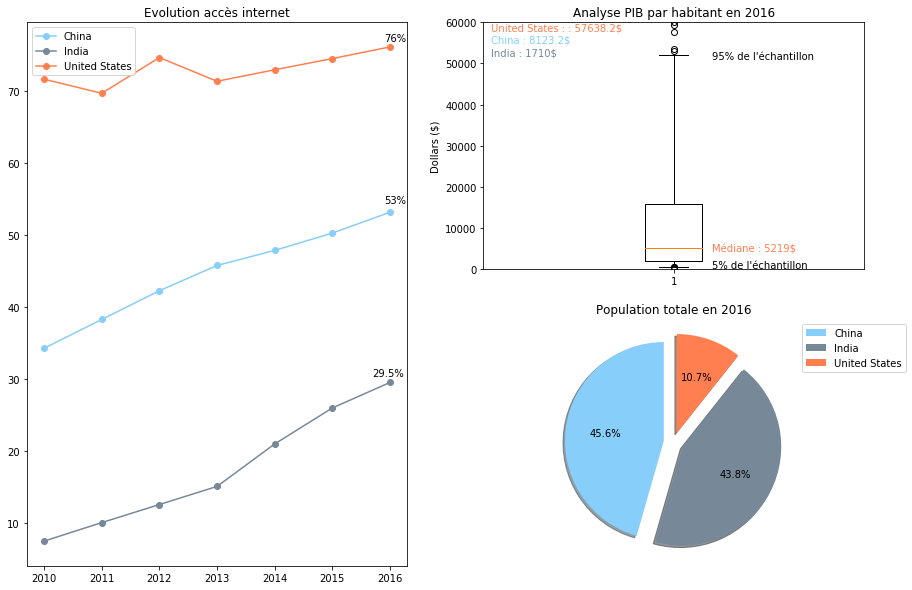

In [350]:
plt.figure(1,figsize=(15, 10))

ax1 = plt.subplot(1, 2, 1)

data = analyse_pays_hyp2.loc[analyse_pays_hyp2['Indicator Code'] == 'IT.NET.USER.P2']
annees = ['2010','2011','2012','2013','2014','2015','2016']

#On trace les courbes de chaque pays
for i in data.itertuples():
    
    if data.loc[i[0],'Country Name'] == 'United States':
        ax1.plot(annees, data.loc[i[0],'2010':'2016'],\
                label=data.loc[i[0],'Country Name'], marker = 'o',color = 'coral')
        
    elif data.loc[i[0],'Country Name'] == 'China':
        ax1.plot(annees, data.loc[i[0],'2010':'2016'],\
                label=data.loc[i[0],'Country Name'], marker = 'o',color = 'lightskyblue')
        
    elif data.loc[i[0],'Country Name'] == 'India':
        ax1.plot(annees, data.loc[i[0],'2010':'2016'],\
                label=data.loc[i[0],'Country Name'], marker = 'o',color = 'lightslategray')

#On paramètre le graphique et on l'affiche
ax1.set(title="Evolution accès internet")

ax1.legend(loc = 'upper left', prop = {'size': 10})
ax1.text(5.9, 77, '76%', fontsize = 10, color = 'black')
ax1.text(5.9, 54.5, '53%', fontsize = 10, color = 'black')
ax1.text(5.7, 30.5, '29.5%', fontsize = 10, color = 'black')

ax2 = plt.subplot(2, 2, 2)

#On construit tout d'abord les données à tracer
#On appelle la fonction qui nous trie le dataset de base en fonction d'un indicateur
data = filtre_indicateur(data_par_pays,'NY.GDP.PCAP.CD')

#Ensuite on trie le résultat par ordre décroissant suivant une colonne donnée
#Ici 2016, est la dernière année contenant des données
data = data.sort_values(by = '2016', ascending = False)

#Le tri précédent ayant aussi modifié l'ordre des lignes, on remet l'index du dataframe à 0
data = data.reset_index(drop = True)

#Enfin, on supprime les lignes contenant des valeurs nulles
data = list(data['2016'].dropna())

ax2.boxplot(data,whis=[5,95])

#On paramètre le graphique et on l'affiche
ax2.set(ylim=[0,60000],title="Analyse PIB par habitant en 2016", ylabel='Dollars ($)')

ax2.text(1.1, 4400, 'Médiane : 5219$', fontsize = 10, color = 'coral')
ax2.text(1.1, 200, "5% de l'échantillon", fontsize = 10, color = 'black')
ax2.text(1.1, 51000, "95% de l'échantillon", fontsize = 10, color = 'black')

ax2.text(0.52, 58000, 'United States : : 57638.2$', fontsize = 10, color = 'coral')
ax2.text(0.52, 55000, 'China : 8123.2$', fontsize = 10, color = 'lightskyblue')
ax2.text(0.52, 52000, 'India : 1710$', fontsize = 10, color = 'lightslategray')

ax3 = plt.subplot(2, 2, 4)

data = analyse_pays_hyp2.loc[analyse_pays_hyp2['Indicator Code'] == 'SP.POP.TOTL']
data = data['2016']

labels = analyse_pays_hyp2['Country Name'].unique()

explode = (0.1, 0.1, 0.1)
colors = ['lightskyblue', 'lightslategray','coral']

ax3.set(title="Population totale en 2016")
ax3.pie(data, explode=explode, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)
ax3.legend(bbox_to_anchor = (1, 1), loc = 'best', labels=labels)


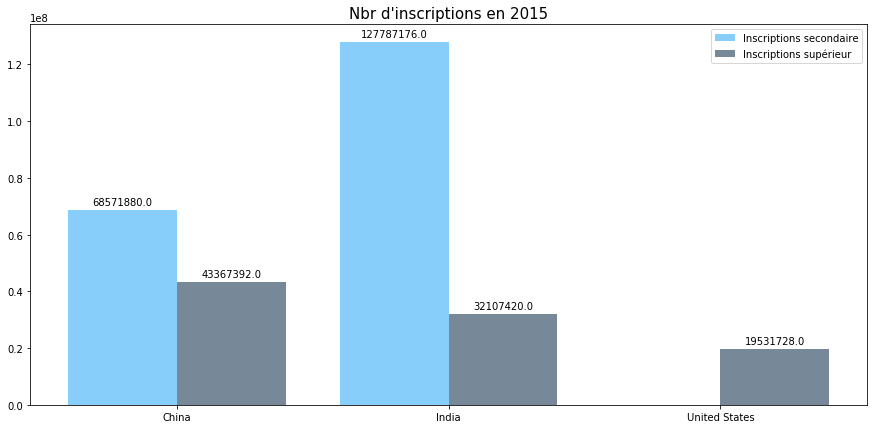

In [269]:
#On crée un graphique pour visualiser le nombre d'inscriptions au secondaire et supérieur

#On dimensionne le graphique
fig, ax = plt.subplots(figsize=(15, 7))

name = analyse_pays_hyp2['Country Name'].unique()

#On construit les barres pour le secondaire
inscriptions_sec = analyse_pays_hyp2.loc[analyse_pays_hyp2['Indicator Code'] == 'SE.SEC.ENRL.GC']
inscriptions_sec = inscriptions_sec['2015']

inscriptions_sup = analyse_pays_hyp2.loc[analyse_pays_hyp2['Indicator Code'] == 'SE.TER.ENRL']
inscriptions_sup = inscriptions_sup['2015']

barWidth = 0.4
position_sec = range(len(inscriptions_sec))
position_sup = [x + barWidth for x in position_sec]

bar1 = ax.bar(position_sec, inscriptions_sec, width = barWidth, color = 'lightskyblue')
bar2 = ax.bar(position_sup, inscriptions_sup, width = barWidth, color = 'lightslategray')

plt.xticks([r + barWidth / 2 for r in range(len(inscriptions_sec))], name)

plt.title("Nbr d'inscriptions en 2015", size=15)
ax.legend(['Inscriptions secondaire','Inscriptions supérieur'], loc = "upper right")

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(bar1, "center")
autolabel(bar2, "center")

# Les indicateurs futurs

Afin d'appuyer l'analyse précédente, qui se porte que sur des indicateurs s'arrêtant maximum en 2016, j'ai cherché des indicateurs avec des données prévisionnelles.

J'ai choisi un indicateur intéressant (PRJ.POP.ALL.4.MF), qui représente la perspective de réussite en enseignement supérieur. C'est un point essentiel pour la réussite du 

L'analyse qui suivra couvrera une période allant de 2020 à 2030.

In [354]:
#on recherche les indicateurs contenant des données après 2017
#afin d'en identifier un qui pourrait nous montrer les tendances à venir sur un point qui nous interesserait

colonnes_a_tester = list(data_par_pays.loc[:,"2017":])

#Ensuite,on utilise le dropna()
#le paramètre how='all' configure la fonction pour qu'il teste que TOUTES les cellules soient vides
#Le subset, c'est la plage de cellules à tester. Celle qu'on a déterminé précédemment.
df = data_par_pays.dropna(how="all", subset=colonnes_a_tester)
df = df['Indicator Name'].unique()
df.shape

(348,)

In [362]:
data = filtre_indicateur(data_par_pays,'PRJ.POP.ALL.4.MF')
data = data.sort_values(by = '2050', ascending = False)
data = data.reset_index(drop=True)
data = data.loc[:2,:]
data['2050']

0    248880.50
1    237643.28
2    145446.92
Name: 2050, dtype: float64

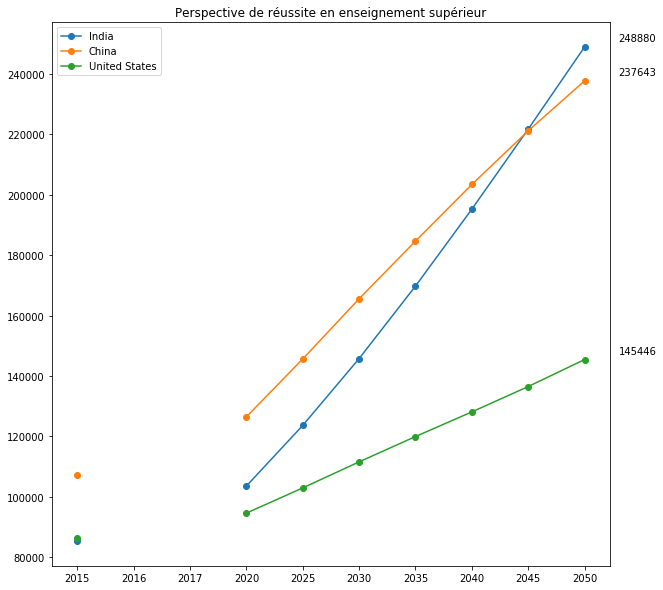

In [396]:
#On trace l'évolution du taux d'accès à internet de chaque pays

data = filtre_indicateur(data_par_pays,'PRJ.POP.ALL.4.MF')
data = data.sort_values(by = '2050', ascending = False)
data = data.reset_index(drop=True)
data = data.loc[:2,:]

annees = ['2015','2016','2017','2020','2025','2030','2035','2040','2045','2050']

fig, ax = plt.subplots(figsize=(10, 10))

#On trace les courbes de chaque pays
for i in data.itertuples():
    
    ax.plot(annees, data.loc[i[0],'2015':'2050'],\
            label=data.loc[i[0],'Country Name'],marker='o')

ax.legend(loc = 'upper left', prop = {'size': 10})
ax.text(9.6, 250880, '248880', fontsize = 10, color = 'black')
ax.text(9.6, 239643, '237643', fontsize = 10, color = 'black')
ax.text(9.6, 147446, '145446', fontsize = 10, color = 'black')

#On paramètre le graphique et on l'affiche
ax.set(title="Perspective de réussite en enseignement supérieur")

#On enregistre le graphique
plt.savefig('evol_pop_ens_sup.png', transparent = True, dpi = 700)

plt.show()

# Conclusion

<u>Voici ce que l'on peut conclure de toutes les analyses précédentes : </u>

 - Le taux de remplissage des données ciblant l’éducation est faible
<br><br>
 - <span style="color:orange"><b>Il existe plusieurs possibilités pour qu’Academy s’internationalise :</b></span>

   - S’implanter dans un pays où les infrastructures sont développées mais une population faible en enseignement supérieur :
   - Les formations Academy pourraient être un moteur pour la croissance de cette population
   - Qatar ou Macao en Chine
<br><br>
 - <span style="color:orange"><b>S’implanter dans un pays où les infrastructures sont développées et avec une population en enseignement supérieur intéressante :</b></span>
   - Les Etats-Unis  ont un très fort potentiel
   - Norvège, Suisse, Irlande
<br><br>
 - <span style="color:orange"><b>S’implanter dans un pays plus pauvre mais avec une population en enseignement supérieur forte :</b></span>
   - Possibilité de formations gratuites? Financer par la publicité ou des aides de l’état par exemple
   - L’inde et la Chine
<br><br>
Ceci conclue ce projet. Il n'y a pas de *bonne réponse* à une aide décisionnelle. Le but est d'explorer différentes hypothèses en se mettant à la place de l'entreprise et en se posant les bonnes questions. Nous avons développer deux hypothèses, nous aurions pu penser à d'avantages d'options. Attention toutefois à ne pas développer trop d'hypothèses, ce qui réduirait la pertinence de votre étude.

Merci et bravo d'être arrivé jusque là! N'hésitez pas à commenter, toutes remarques ou questions seront les bienvenues et surement utiles à d'autres personnes.

<b>Julien Di Giulio</b>